<a href="https://colab.research.google.com/github/nicanorjimenez/Midterm-Project/blob/main/LinAlg_Midterms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Jimenez, Nicanor J.<br>
    201920022 <br>
   Wed 7:00-8:30 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [95]:
import pandas as pd
#import the data into colab 
file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [96]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


In [ ]:
df_sales.values

## Part 1: Monthly Sales

In [135]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))

array_price = np.array(df_prices)[0] 
prices_mat = array_price.reshape((12,1))## reshaped the vector to the appropriate size
array_cost = np.array(df_prices)[1] 
costs_mat = array_cost.reshape((12,1))


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [134]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales_mat@prices_mat
    monthly_costs = sales_mat@costs_mat#used matrix multiplication 
    monthly_profits = np.subtract(monthly_revenue,monthly_costs)
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()#return the variables

In [133]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
month_rev
month_cost#visualizing the values for moth
month_profit



array([51773, 22977, 65683, 20772, 48787, 24749, 36263, 22506, 38520,
       23036, 24213, 84289])

## Part 2: Flavor Sales

In [132]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = np.dot(month_rev,12)#used 12 for the months of the whole year
    flavor_costs = np.dot(month_cost,12)
    flavor_profits = np.subtract(flavor_revenue,flavor_costs) 
    return flavor_profits.flatten()



In [131]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
flavor_profit#visualizing the results of flavor_profit


array([ 621276,  275724,  788196,  249264,  585444,  296988,  435156,
        270072,  462240,  276432,  290556, 1011468])

In [130]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
sorted_prof = np.argsort(flavor_profit)
sort_prof = np.sort(flavor_profit)#to get the lowest values
n=3
best_rslt=sorted_prof[-n : ]#using argsort to get the highest values


best_3_flavors = print(best_rslt)
worst_3_flavors = print(sorted_prof[:n])


[ 0  2 11]
[3 7 1]


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [129]:
import matplotlib.pyplot as  plt
import matplotlib 
import seaborn as sns

%matplotlib inline

#### Entire Dataset

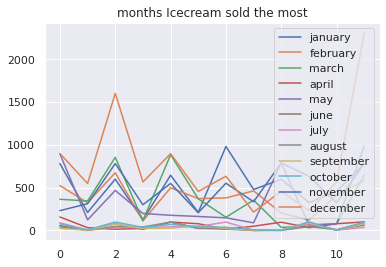

In [128]:

# get columns to plot
columns = df_sales.columns.drop(['flavor'])
# create x data
x_data = range(0, df_sales.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df_sales[column], label=column)
# set title and legend
ax.set_title('months Icecream sold the most')
ax.legend()

#some of the codes inspired from a  matplot guide in youtube

#### Monthly Sales

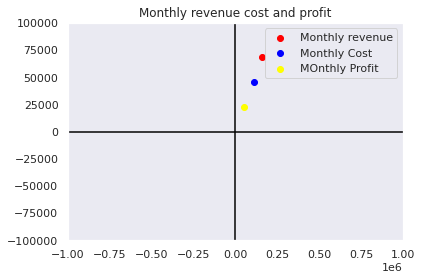

In [118]:
plot_month_revenue = month_rev
plot_month_cost = month_cost
plot_month_profit = month_profit




plt.scatter(plot_month_revenue[0],plot_month_revenue[1], label='Monthly revenue', c='red')
plt.scatter(plot_month_cost[0],plot_month_cost[1], label='Monthly Cost', c='blue')
plt.scatter(plot_month_profit[0],plot_month_profit[1], label='MOnthly Profit', c='yellow')

plt.title("Monthly revenue cost and profit")
plt.xlim(-1000000, 1000000)
plt.ylim(-100000, 100000)
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid()
plt.legend()
plt.show()

#some codes inspired  from my Lab activity 2

#### Flavor Sales

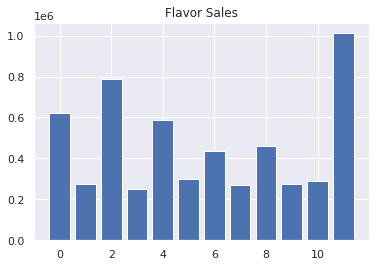

In [117]:
n = flavor_profit

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Flavor Sales")
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

according to the data  during the months of December  to may is when Ice cream sells the most it might be  due to the summer and the weather being hot or maybe of kids not having school that is why  there are a lot of sales during that time also according to the data it would be better if during august to october the production be lessen since not a lot of people buy during that Time 